In [1]:
import hopsworks

project = hopsworks.login() 

fs = project.get_feature_store() 

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/5419
Connected. Call `.close()` to terminate connection gracefully.


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
import tensorflow as tf

#import os
#import warnings
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, TimeDistributed, Flatten, Dropout, RepeatVector,Bidirectional
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.stattools import adfuller, kpss, ccf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [3]:
import pandas as pd

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
from datetime import timedelta, datetime
import warnings
warnings.filterwarnings("ignore")

In [6]:
feature_view = fs.get_feature_view(
    name = 'air_quality_fv',
    version = 1
)

In [7]:
feature_df, label_df = feature_view.get_training_data(training_dataset_version=5)

In [8]:
feature_df

,date,pm25,pm10,o3,no2,so2,co,aqi,tempmax,tempmin,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions
0,1397426400000,-1.733552,0.869502,-0.063088,0.885893,-0.459532,-1.687549,34,-0.530978,-0.165237,...,0.858836,1.574734,1.303167,0.320324,-0.017705,-0.547535,0.909551,0.893745,0.861053,2
1,1419634800000,0.222489,-0.774729,-0.563470,-1.223226,-0.459532,-1.687549,56,-1.728461,-1.302841,...,1.620198,1.382652,-1.313773,-1.236048,0.653125,-1.121138,-1.259437,-1.270876,-1.693326,5
2,1451775600000,-0.196663,-0.484571,-0.480073,0.265564,-0.459532,0.999969,44,-0.955402,-0.440464,...,0.858836,0.806407,-0.489720,-1.602253,1.301594,-0.409446,-1.084246,-1.075139,-0.963503,4
3,1453590000000,0.851216,0.579344,-1.397440,0.265564,2.742227,0.999969,9,-0.606768,-0.495509,...,-0.080864,0.078517,0.176489,1.276526,1.320228,-1.577896,-1.174828,-1.178764,-1.328414,4
4,1453676400000,0.781357,1.062941,-0.146485,0.141498,-0.459532,-0.343790,72,-0.136870,0.109989,...,0.419852,0.523339,0.000140,0.818769,0.231993,-0.058910,-0.708978,-0.718207,-0.598592,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,1525989600000,0.397135,0.095746,2.021838,0.761827,-0.459532,0.328089,61,0.545241,-0.550555,...,-0.869662,-1.063864,-0.964339,0.391530,-1.217746,-0.802470,1.537651,1.550040,1.225965,1
3077,1550185200000,0.851216,1.643258,-1.063852,1.630288,2.742227,2.343727,74,-0.061080,-1.064311,...,-1.192041,-0.912221,-0.378685,1.459628,-2.391699,1.661899,-0.459132,-0.441872,-0.233681,6
3078,1561500000000,0.816287,-0.581290,0.353897,-1.223226,-0.459532,-0.343790,73,1.106087,1.577866,...,-0.293496,-0.214660,1.771255,0.940838,-0.502194,-0.377579,0.563150,0.594382,1.225965,1
3079,1584486000000,-0.336380,-0.484571,0.020309,-0.354765,-0.459532,0.328089,40,-0.379398,-0.165237,...,0.426711,0.776078,0.389851,0.981527,0.962452,1.502565,0.348142,0.341076,-0.598592,12


In [10]:
feature_df.to_csv('feature_df.csv')


In [12]:
feature_df = feature_df.sort_values(by=["date"], ascending=[False]).reset_index(drop=True)


In [13]:
feature_df

,date,pm25,pm10,o3,no2,so2,co,aqi,tempmax,tempmin,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions
0,1673478000000,-1.314401,-2.032082,-0.071427,-2.228159,-0.299444,-0.075039,25,-0.379398,0.201732,...,2.758811,2.514924,0.450811,-1.337771,0.873008,-0.844959,-1.254460,-1.259362,-1.328414,2
1,1672959600000,-1.174683,-1.741924,-0.113126,-2.141313,-0.139356,-0.007851,24,-0.530978,-0.018450,...,2.141491,1.099584,0.358282,-0.076398,0.332617,-0.675003,-1.114108,-1.132709,-1.328414,2
2,1672873200000,0.117701,-0.581290,-0.446714,-1.893181,-0.299444,0.059337,53,-0.515820,0.366868,...,1.263523,1.311885,0.646755,0.177911,0.377339,-0.621891,-1.111122,-1.109681,-0.598592,2
3,1672700400000,-0.196663,-2.418960,-2.148014,-2.712016,-0.459532,-1.687549,44,-0.970560,-1.284493,...,1.373269,0.048189,-0.059732,0.798425,-0.066154,-1.036160,-1.257447,-1.270876,-1.693326,2
4,1672614000000,-0.650744,-0.678009,-0.980455,0.017432,-0.459532,-0.343790,31,-0.515820,-0.568903,...,0.412993,1.028817,0.533543,-0.157777,-0.051247,-1.216739,-1.226589,-1.236334,-1.328414,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,1388876400000,-1.733552,-0.871448,-2.148014,0.141498,-0.459532,-1.687549,23,-0.970560,-0.862478,...,-0.272919,0.685092,0.123149,-1.246220,-0.654994,-0.165133,-1.067324,-1.075139,-0.963503,2
3077,1388790000000,-1.733552,-0.581290,-2.148014,0.761827,-0.459532,-1.687549,28,-0.818980,-0.312025,...,1.359551,1.716268,-0.175121,-1.581908,0.068012,-0.027044,-1.151934,-1.155737,-1.328414,2
3078,1388703600000,-1.733552,-0.774729,-2.148014,0.513695,-0.459532,-1.687549,26,-0.515820,-0.312025,...,1.448720,1.867912,0.068720,-1.571736,-0.159325,-0.632513,-1.067324,-1.075139,-0.963503,2
3079,1388617200000,-1.733552,-1.064887,-2.148014,0.761827,-0.459532,-1.687549,28,-0.667400,-0.275328,...,0.639344,0.968160,0.006671,-1.876906,-0.032613,-0.281978,-1.131030,-1.121195,-1.328414,2


In [43]:
train_size = int(len(feature_df) * 0.70)
temp_size=len(feature_df) - train_size
X_train = feature_df.iloc[temp_size:-1,:]
temp=feature_df.iloc[:temp_size,:]




In [44]:
X_train

,date,pm25,pm10,o3,no2,so2,co,aqi,tempmax,tempmin,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions
925,1593036000000,0.257418,0.289185,3.106000,-0.230700,-0.459532,0.328089,63,2.182306,1.908138,...,-0.259201,-0.457290,-0.996997,0.299979,-2.097279,2.214257,2.626625,2.609322,1.225965,6
926,1592949600000,0.397135,-0.194412,1.771647,-0.354765,-0.459532,0.328089,61,2.136831,1.504472,...,-0.341510,-0.528057,-1.246281,0.727218,0.056832,1.396342,2.160775,2.160278,1.225965,1
927,1592863200000,0.222489,0.289185,2.105235,-0.106634,-0.459532,0.328089,56,1.485037,0.605398,...,-0.945112,-1.215508,1.498022,0.991700,-1.776771,0.992695,2.884435,2.885657,1.225965,6
928,1592776800000,0.047842,0.192466,1.354662,0.017432,1.141348,0.328089,51,0.939349,0.935670,...,-0.451256,-0.629153,0.917810,0.879804,-1.512166,0.599671,3.210928,3.208047,1.590876,1
929,1592690400000,-0.196663,0.676063,0.020309,-0.975094,-0.459532,0.328089,44,1.348615,0.935670,...,0.042600,-0.093345,0.149275,0.330496,-0.081061,1.927456,1.024022,1.031912,1.225965,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,1388962800000,-1.733552,-1.355046,-2.148014,-0.106634,-0.459532,-1.687549,21,-0.076238,-0.330373,...,0.982300,1.433200,0.050214,-1.490357,0.325164,-0.324467,-1.195731,-1.213306,-1.328414,2
3076,1388876400000,-1.733552,-0.871448,-2.148014,0.141498,-0.459532,-1.687549,23,-0.970560,-0.862478,...,-0.272919,0.685092,0.123149,-1.246220,-0.654994,-0.165133,-1.067324,-1.075139,-0.963503,2
3077,1388790000000,-1.733552,-0.581290,-2.148014,0.761827,-0.459532,-1.687549,28,-0.818980,-0.312025,...,1.359551,1.716268,-0.175121,-1.581908,0.068012,-0.027044,-1.151934,-1.155737,-1.328414,2
3078,1388703600000,-1.733552,-0.774729,-2.148014,0.513695,-0.459532,-1.687549,26,-0.515820,-0.312025,...,1.448720,1.867912,0.068720,-1.571736,-0.159325,-0.632513,-1.067324,-1.075139,-0.963503,2


In [47]:
val_size=int(len(temp) * 0.50)
test_size=len(temp) - val_size
X_test= temp.iloc[0:val_size,:]
X_val=temp.iloc[val_size:,:]



In [50]:
X_train = X_train.sort_values(by=["date"], ascending=[False]).reset_index(drop=True)


In [51]:
X_val = X_val.sort_values(by=["date"], ascending=[False]).reset_index(drop=True)


In [52]:
X_test = X_test.sort_values(by=["date"], ascending=[False]).reset_index(drop=True)



In [53]:
X_train[X_train.isna().any(axis=1)]

,date,pm25,pm10,o3,no2,so2,co,aqi,tempmax,tempmin,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions


In [54]:
X_val[X_val.isna().any(axis=1)]

,date,pm25,pm10,o3,no2,so2,co,aqi,tempmax,tempmin,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions
223,1613775600000,0.222489,0.676063,0.020309,-0.106634,-0.459532,1.671848,56,0.181448,0.183383,...,NaN,0.361585,-0.378685,-0.68674,1.178609,-0.080155,0.028617,0.030199,-0.598592,12
231,1613084400000,0.536852,-0.097693,0.187103,-0.726963,-0.459532,0.328089,65,-2.653099,-2.917505,...,NaN,0.846845,-1.210358,NaN,-1.322097,-1.014916,-0.216253,-0.211593,-0.233681,1


In [34]:
X_test[X_test.isna().any(axis=1)]

,date,pm25,pm10,o3,no2,so2,co,aqi,tempmax,tempmin,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions


In [57]:
def give_y(df):
    y=[]
    for i in range(7,len(df)):
        next7days=np.flip(df['aqi'].iloc[i-7:i])
        y.append(next7days)
    return y

y_train=np.array(give_y(X_train))
y_test=np.array(give_y(X_test))
y_val=np.array(give_y(X_val))

In [60]:
X_train=X_train.iloc[7:,1:]
X_train.fillna(X_train.mean(),inplace=True)
X_train=np.reshape(np.array(X_train),(len(X_train),1,len(X_train.columns)))

X_test=X_test.iloc[7:,1:]
X_test.fillna(X_test.mean(),inplace=True)
X_test=np.reshape(np.array(X_test),(len(X_test),1,len(X_test.columns)))

X_val=X_val.iloc[7:,1:]
X_val.fillna(X_val.mean(),inplace=True)
X_val=np.reshape(np.array(X_val),(len(X_val),1,len(X_val.columns)))

In [61]:
X_train.shape

(2148, 1, 28)

In [66]:
# define model
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(1, 28)))
model.add(LSTM(128,dropout=0.5))
model.add(Dense(7))

opt=RMSprop(lr=0.01)
model.compile(optimizer=opt, loss='mse')

In [63]:
history=model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=100, verbose=1)

Epoch 1/100
68/68 [==============================] - 5s 21ms/step - loss: 906.3674 - val_loss: 618.7001
Epoch 2/100
68/68 [==============================] - 1s 9ms/step - loss: 472.0787 - val_loss: 431.6637
Epoch 3/100
68/68 [==============================] - 1s 8ms/step - loss: 453.2918 - val_loss: 448.0714
Epoch 4/100
68/68 [==============================] - 1s 8ms/step - loss: 447.5920 - val_loss: 445.4177
Epoch 5/100
68/68 [==============================] - 0s 7ms/step - loss: 441.9541 - val_loss: 436.8581
Epoch 6/100
68/68 [==============================] - 0s 7ms/step - loss: 439.5158 - val_loss: 430.4374
Epoch 7/100
68/68 [==============================] - 1s 8ms/step - loss: 437.4797 - val_loss: 419.7389
Epoch 8/100
68/68 [==============================] - 1s 8ms/step - loss: 435.3119 - val_loss: 449.8393
Epoch 9/100
68/68 [==============================] - 1s 8ms/step - loss: 433.8091 - val_loss: 428.7531
Epoch 10/100
68/68 [==============================] - 1s 8ms/step - loss

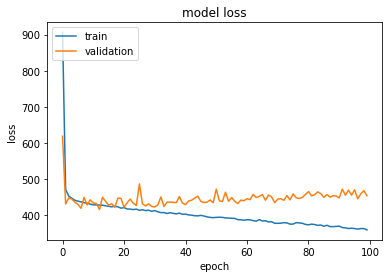

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [68]:
history=model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=35, verbose=1)

Epoch 1/35
68/68 [==============================] - 5s 18ms/step - loss: 887.8569 - val_loss: 464.7208
Epoch 2/35
68/68 [==============================] - 1s 7ms/step - loss: 467.6313 - val_loss: 447.4107
Epoch 3/35
68/68 [==============================] - 0s 7ms/step - loss: 450.0464 - val_loss: 423.6521
Epoch 4/35
68/68 [==============================] - 1s 7ms/step - loss: 444.4603 - val_loss: 452.4171
Epoch 5/35
68/68 [==============================] - 1s 8ms/step - loss: 444.0828 - val_loss: 427.3484
Epoch 6/35
68/68 [==============================] - 1s 8ms/step - loss: 442.2278 - val_loss: 465.9790
Epoch 7/35
68/68 [==============================] - 1s 7ms/step - loss: 437.7239 - val_loss: 423.5878
Epoch 8/35
68/68 [==============================] - 1s 8ms/step - loss: 433.8578 - val_loss: 428.4493
Epoch 9/35
68/68 [==============================] - 1s 7ms/step - loss: 434.2427 - val_loss: 422.5247
Epoch 10/35
68/68 [==============================] - 1s 8ms/step - loss: 431.6481

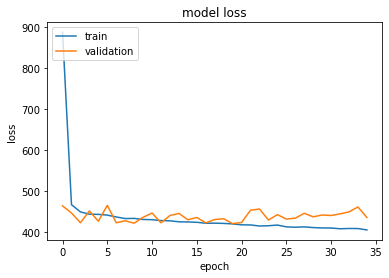

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [70]:
print('root mean_squared_error testing : ', mean_squared_error(y_test, model.predict(X_test), squared=False))

15/15 [==============================] - 1s 2ms/step
root mean_squared_error testing :  21.885758448305342


15/15 [==============================] - 0s 4ms/step


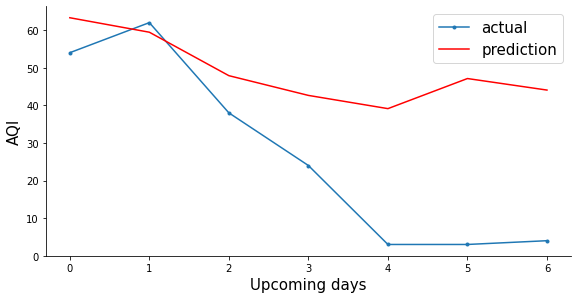

In [78]:
test_predict=model.predict(X_test)

idx = 7
aa=[x for x in range(idx)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[100], marker='.', label="actual")
plt.plot(aa, test_predict[100], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('AQI', size=15)
plt.xlabel('Upcoming days', size=15)
plt.legend(fontsize=15)
plt.show();

In [22]:
mr = project.get_model_registry()

Connected. Call `.close()` to terminate connection gracefully.


In [23]:
from hsml.schema import Schema
from hsml.model_schema import ModelSchema

input_schema = Schema(X_train)
output_schema = Schema(y_train)
model_schema = ModelSchema(input_schema=input_schema, output_schema=output_schema)

model_schema.to_dict()

{'input_schema': {'tensor_schema': {'shape': '(1535, 1, 28)',
   'type': 'float64'}},
 'output_schema': {'tensor_schema': {'shape': '(1535, 7)', 'type': 'int64'}}}

In [25]:
import joblib

joblib.dump(model, 'model.pkl')

2023-01-12 17:43:56,835 WARNING: Found untraced functions such as lstm_cell_4_layer_call_fn, lstm_cell_4_layer_call_and_return_conditional_losses, lstm_cell_5_layer_call_fn, lstm_cell_5_layer_call_and_return_conditional_losses while saving (showing 4 of 4). These functions will not be directly callable after loading.
2023-01-12 17:43:57,863 INFO: Assets written to: ram://d5f3de6a-efda-43a1-99d1-22e2511505b9/assets


['model.pkl']

In [27]:
model = mr.sklearn.create_model(
    name="LSTM_model",
    metrics={"rmse": "21.27"},
    description="LSTM model",
    input_example=None,
    model_schema=model_schema
)

model.save('model.pkl')

  0%|          | 0/6 [00:00<?, ?it/s]

Model created, explore it at https://c.app.hopsworks.ai:443/p/5419/models/LSTM_model/1


Model(name: 'LSTM_model', version: 1)